In [1]:
#import pandas
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      age     bmi  children  sex_male  smoker_yes
1163   18  28.215         0         0           0
196    39  32.800         0         0           0
438    52  46.750         5         0           0
183    44  26.410         0         0           0
1298   33  27.455         2         1           0
...   ...     ...       ...       ...         ...
763    27  26.030         0         1           0
835    42  35.970         2         1           0
1216   40  25.080         0         1           0
559    19  35.530         0         1           0
684    33  18.500         1         0           0

[936 rows x 5 columns]
          charges
1163   2200.83085
196    5649.71500
438   12592.53450
183    7419.47790
1298   5261.46945
...           ...
763    3070.80870
835    7160.33030
1216   5415.66120
559    1646.42970
684    4766.02200

[936 rows x 1 columns]
      age     bmi  children  sex_male  smoker_yes
578    52  30.200         1         1           0
610    47  29.370         1         

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train
X_test

array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
       [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
       [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
       ...,
       [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
       [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
       [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]])

In [9]:
from sklearn.svm import SVR
regressor=SVR(kernel="poly", gamma='scale',C=3000)
regressor.fit(X_train,Y_train)

C:\Users\Pandiyan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=3000, kernel='poly')

In [10]:
Y_predict=regressor.predict(X_test)
Y_predict

array([ 9882.23553045,  8684.53726052, 47863.91492801, 12571.3296839 ,
       10503.41343965,  4754.93723665,  1443.94974332, 11161.657231  ,
        7435.84538836,  5371.62749203,  6792.36540753, 10061.14110577,
        7632.07502973,  4871.76871538, 25340.31666642, 10702.78951231,
       12523.59208885,  3559.80058082,  6538.68332237, 24014.94367286,
       25935.15514707, 12148.61708249,  9691.29174851, 30533.71413143,
        1963.47262983,  4967.98361807,  4445.33159778,  8003.49970394,
        4385.68529386,  8313.99557978,  7894.30531574, 51334.29195098,
       13004.91484206, 10251.92921715, 12711.42308371,  4153.88138193,
        8739.42694068, 35968.17012455, 35436.61473361,  2077.05999458,
        5945.32507383,  3376.59733561, 27298.90556466, 44665.58571445,
       32712.02939249,  3248.44366366, 10704.52721091,  7044.43520973,
        4729.54504139, 12142.93055349,  2793.08923534,  2960.73592137,
       30936.72609045, 42934.61243677, 11849.41436963,  3311.33971211,
      

In [11]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predict)
r2

0.8598930084494358

In [12]:
import numpy as np
Ytest= np.array(Y_test).flatten()
Ypredict= np.array(Y_predict).flatten()
residuals=Ytest-Ypredict
residuals

array([-1.57705530e+02, -1.36845961e+02, -2.16189258e+03,  3.78741516e+02,
       -8.59160940e+02, -2.54597987e+02,  7.54240107e+02,  2.75080919e+02,
        1.01318512e+02,  5.33958580e+01, -3.93274075e+01,  4.32804694e+02,
       -2.94327030e+02, -6.86670815e+02, -7.02957467e+03, -1.47112314e-01,
        1.27111453e-02, -6.92514808e+01, -8.08399224e+01,  9.46087348e+03,
       -1.96777210e+03,  4.94760718e+02,  1.33542744e+04, -7.46829343e+03,
       -2.88840330e+02, -3.00375968e+02, -7.12706498e+02, -3.20829704e+02,
       -6.29063694e+02,  9.94674702e+01,  1.65373784e+02, -2.36404435e+03,
       -2.55568421e+01,  1.03783543e+04,  1.86046772e+03, -1.63586819e+01,
       -3.92262641e+02,  1.52263890e+04,  4.56671752e+03, -1.96572995e+02,
       -4.87278624e+02, -5.09477736e+02, -7.14958266e+03,  2.83090874e+03,
        3.43745411e+03,  2.27705069e+04,  9.04485617e+03, -1.03525360e+02,
       -1.13414914e+01,  1.00495066e+04,  1.06400115e+02,  1.58779677e+04,
       -7.36845409e+03,  

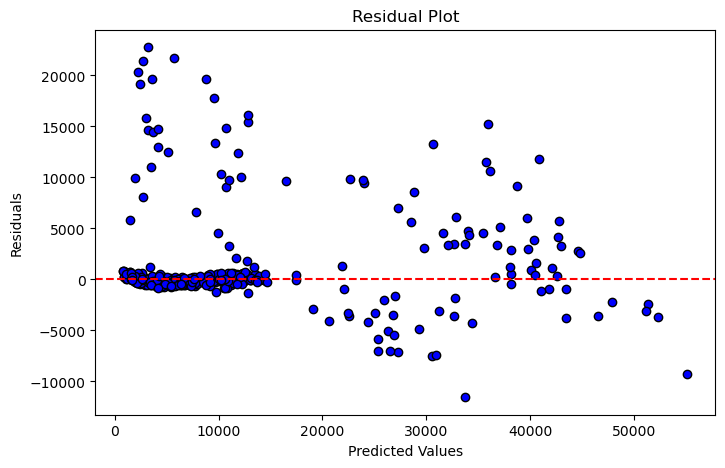

In [13]:
import matplotlib.pyplot as plt
# Plotting residuals
plt.figure(figsize=(8, 5))
plt.scatter(Ypredict, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()